### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
df = pd.read_csv("../input/churn-dataset/Churn.csv")
df.sample(3)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
1415,99,0,142.3,204.5,203.1,9.1,0,no,no,no,...,24.19,95,17.38,114,9.14,1,2.46,LA,510,379-9821
1288,56,0,253.2,188.0,142.0,4.4,1,no,no,no,...,43.04,116,15.98,133,6.39,4,1.19,MA,510,401-3622
2538,34,0,128.8,208.7,202.1,14.0,1,no,no,no,...,21.90,93,17.74,103,9.09,7,3.78,WY,408,339-6446


In [3]:
df = df.drop(columns = ["Phone", "Area_Code"])

### Data Information

In [4]:
# Variables information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [5]:
# Variables Statistics
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000


### Insights

In [6]:
# Churn Classes
df["Churn"].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [7]:
# Average by Classes
df.groupby("Churn").mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Churn,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545


**Churn by State**

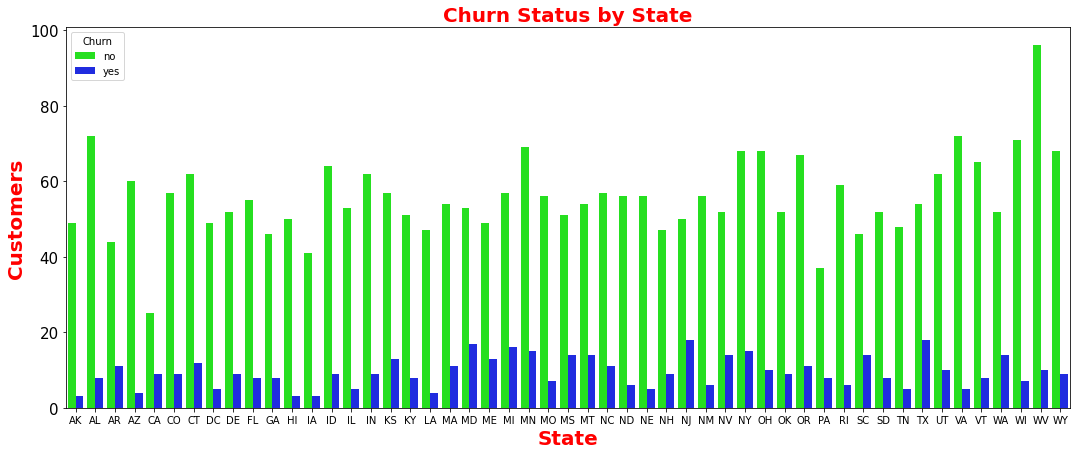

In [8]:
cs = df.groupby(["State", "Churn"])["Churn"].agg(["count"]).reset_index()
cs.columns = ["State", "Churn", "Customers"]

plt.figure(figsize = (18, 7))
sns.barplot(x = "State", y = "Customers", hue = "Churn", data = cs, palette = "hsv")
plt.title("Churn Status by State", color = "red", size = 20, weight = "bold")
plt.yticks(size = 15)
plt.xlabel("State", color = "red", size = 20, weight = "bold")
plt.ylabel("Customers", color = "red", size = 20, weight = "bold")
plt.show()

**Maximum Churn by State**

In [9]:
cs[(cs["Churn"] == "yes")].max()

State         WY
Churn        yes
Customers     18
dtype: object

**Maximum Retained Customers by State**

In [10]:
cs[cs["Churn"] == "no"].max()

State        WY
Churn        no
Customers    96
dtype: object

**Distribution of Minutes used in Days by Customers**

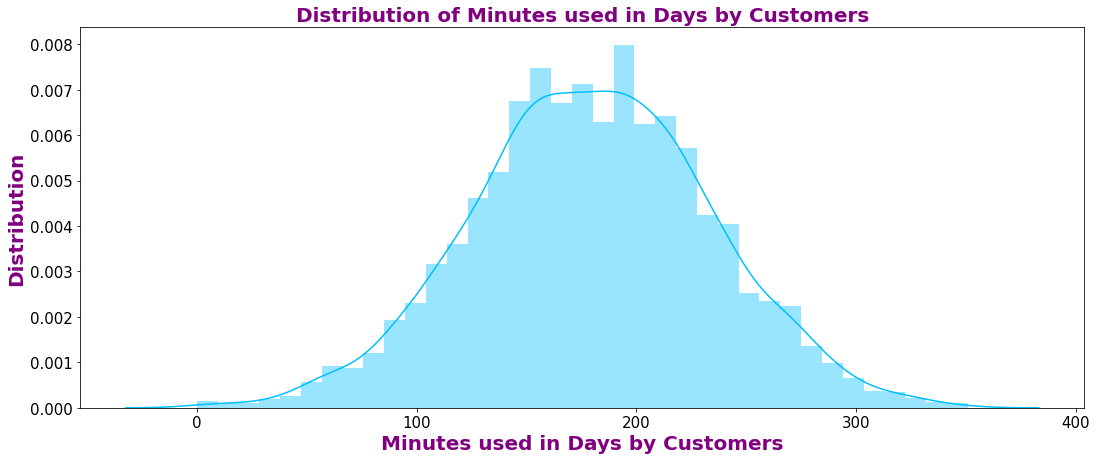

In [11]:
plt.figure(figsize = (18, 7))
sns.distplot(x = df["Day_Mins"], color = "deepskyblue")
plt.title("Distribution of Minutes used in Days by Customers", size = 20, color = "purple", weight = "bold")
plt.xlabel("Minutes used in Days by Customers", size = 20, color = "purple", weight = "bold")
plt.ylabel("Distribution", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Distribution of Minutes used in Evenning by Customers**

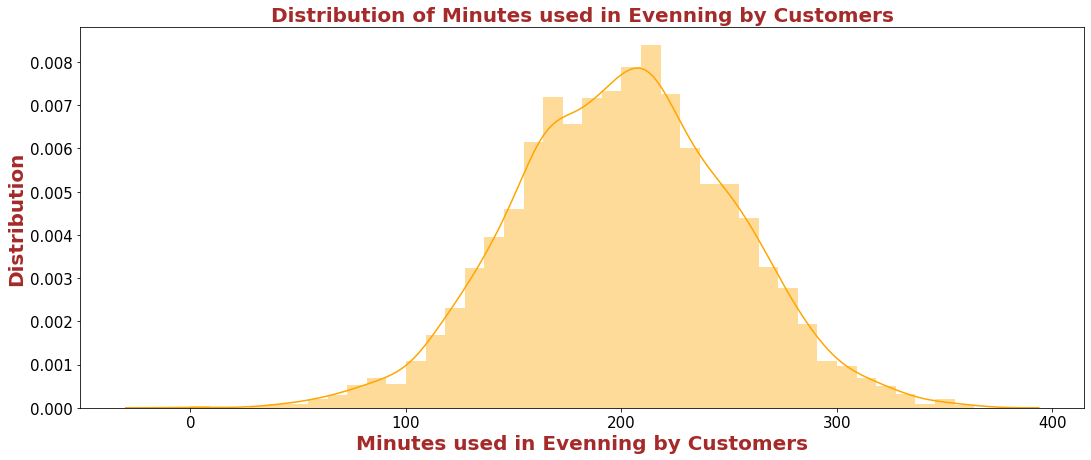

In [12]:
plt.figure(figsize = (18, 7))
sns.distplot(x = df["Eve_Mins"], color = "orange")
plt.title("Distribution of Minutes used in Evenning by Customers", size = 20, color = "brown", weight = "bold")
plt.xlabel("Minutes used in Evenning by Customers", size = 20, color = "brown", weight = "bold")
plt.ylabel("Distribution", size = 20, color = "brown", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Distribution of Minutes used in Night by Customers**

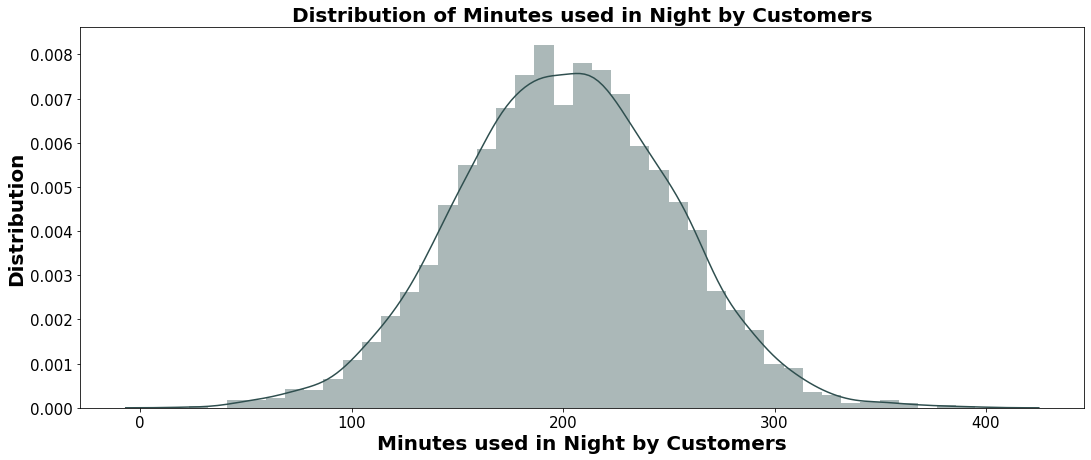

In [13]:
plt.figure(figsize = (18, 7))
sns.distplot(x = df["Night_Mins"], color = "darkslategrey")
plt.title("Distribution of Minutes used in Night by Customers", size = 20, weight = "bold")
plt.xlabel("Minutes used in Night by Customers", size = 20, weight = "bold")
plt.ylabel("Distribution", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Distribution of International Minutes**

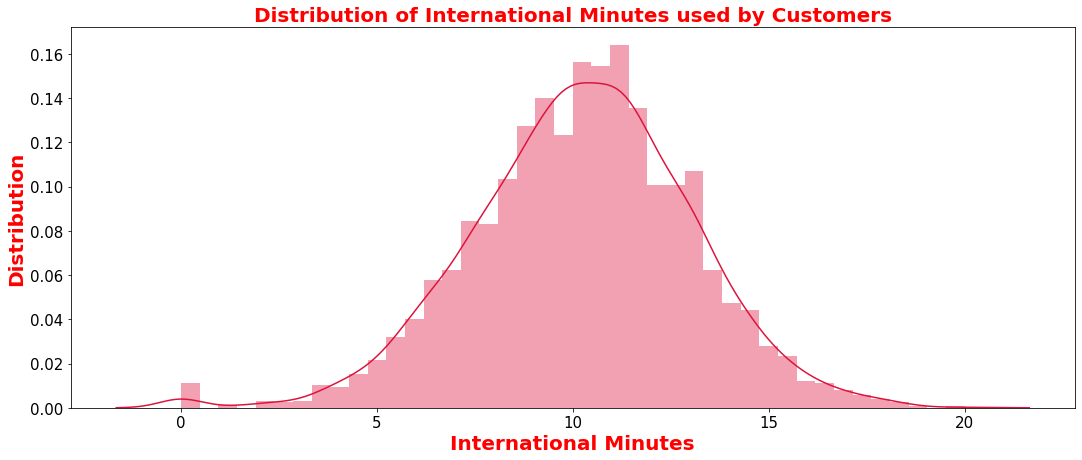

In [14]:
plt.figure(figsize = (18, 7))
sns.distplot(x = df["Intl_Mins"], color = "crimson")
plt.title("Distribution of International Minutes used by Customers", size = 20, color = "red", weight = "bold")
plt.xlabel("International Minutes", size = 20, color = "red", weight = "bold")
plt.ylabel("Distribution", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Difference in Account Length**

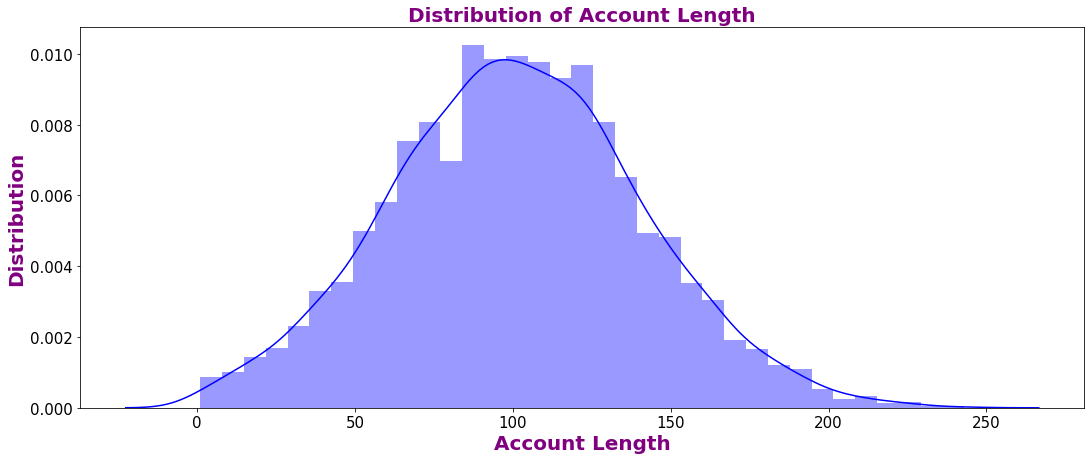

In [15]:
plt.figure(figsize = (18, 7))
sns.distplot(x = df["Account_Length"], color = "blue")
plt.title("Distribution of Account Length", size = 20, color = "purple", weight = "bold")
plt.xlabel("Account Length", size = 20, color = "purple", weight = "bold")
plt.ylabel("Distribution", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

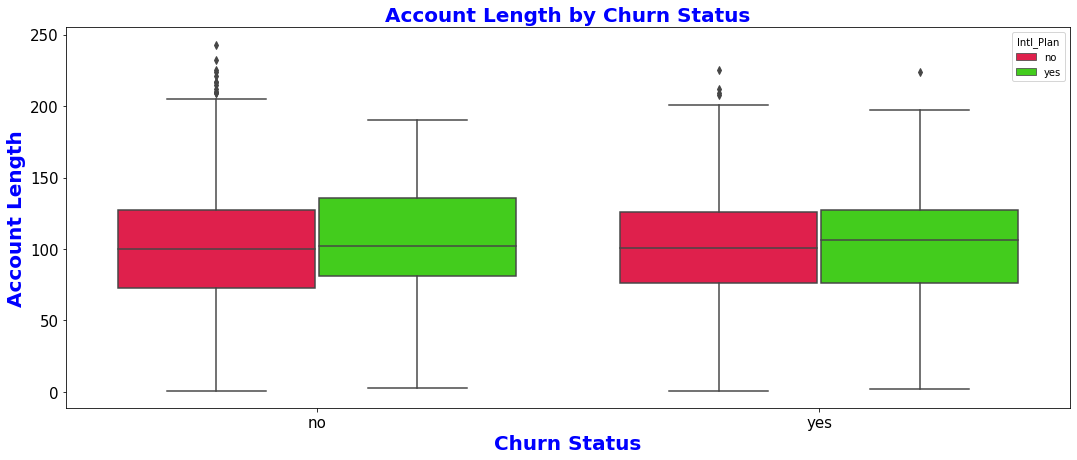

In [16]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Churn", y = "Account_Length", hue = "Intl_Plan", data = df, palette = "prism_r")
plt.title("Account Length by Churn Status", color = "blue", size = 20, weight = "bold")
plt.xlabel("Churn Status", color = "blue", size = 20, weight = "bold")
plt.ylabel("Account Length", color = "blue", size = 20, weight = "bold")
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

**Customer Service Calls and Churn**

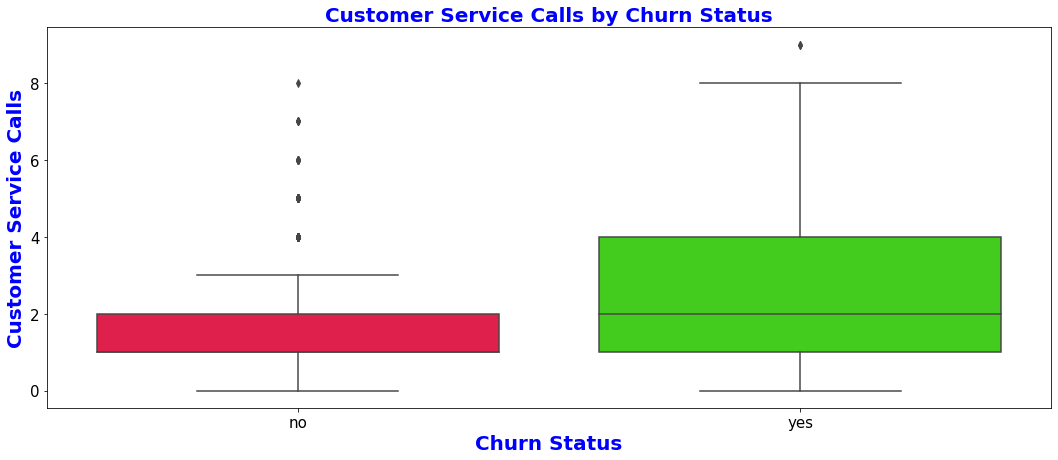

In [17]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Churn", y = "CustServ_Calls", data = df, palette = "prism_r")
plt.title("Customer Service Calls by Churn Status", color = "blue", size = 20, weight = "bold")
plt.xlabel("Churn Status", color = "blue", size = 20, weight = "bold")
plt.ylabel("Customer Service Calls", color = "blue", size = 20, weight = "bold")
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

**Customer Service Calls by Churn Status having Voice Mail Plan**

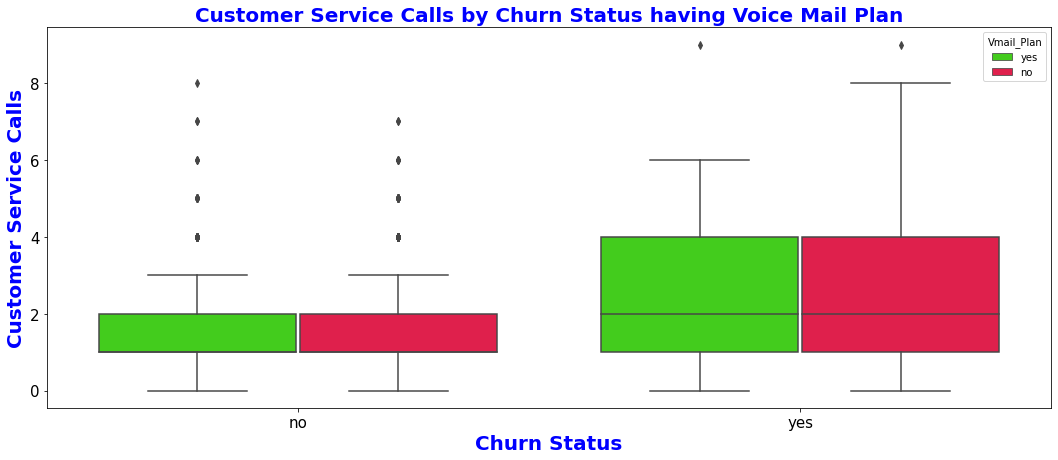

In [18]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Churn", y = "CustServ_Calls", data = df, hue = "Vmail_Plan", palette = "prism")
plt.title("Customer Service Calls by Churn Status having Voice Mail Plan", color = "blue", size = 20, weight = "bold")
plt.xlabel("Churn Status", color = "blue", size = 20, weight = "bold")
plt.ylabel("Customer Service Calls", color = "blue", size = 20, weight = "bold")
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

**Customer Service Calls by Churn Status having International Plan**

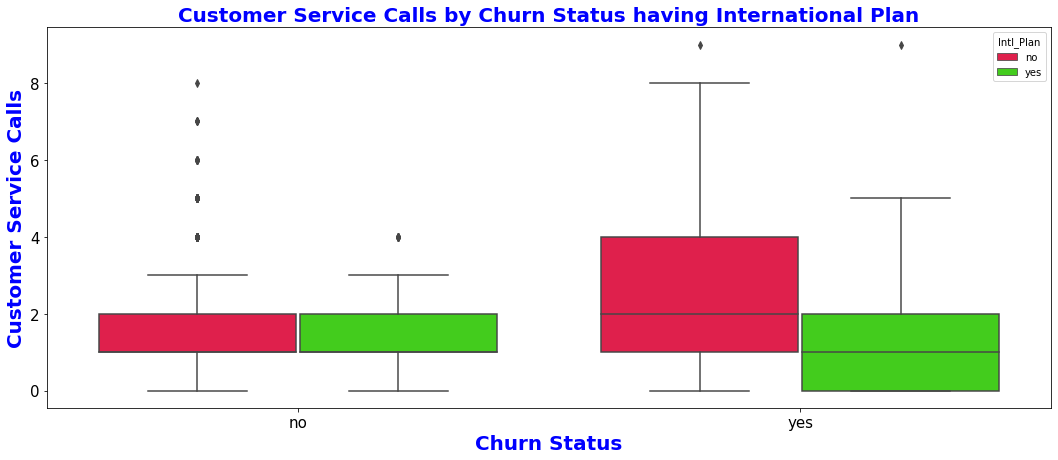

In [19]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Churn", y = "CustServ_Calls", data = df, hue = "Intl_Plan", palette = "prism_r")
plt.title("Customer Service Calls by Churn Status having International Plan", color = "blue", size = 20, weight = "bold")
plt.xlabel("Churn Status", color = "blue", size = 20, weight = "bold")
plt.ylabel("Customer Service Calls", color = "blue", size = 20, weight = "bold")
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

*It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an voice mail plan or international plan, in which case they leave fewer customer service calls*

### Data Preprocessing

In [20]:
# Assign Label 
df["Intl_Plan"] = df["Intl_Plan"].replace({"no": 0,
                                           "yes": 1})

df["Churn"] = df["Churn"].replace({"no": 0,
                                   "yes": 1})

df["Vmail_Plan"] = df["Vmail_Plan"].replace({"no": 0,
                                             "yes": 1})

In [21]:
# Dummy Variables
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

### Feature Engineering

**Total Mins**

In [22]:
df["Total_Mins"] = df["Day_Mins"] + df["Eve_Mins"] + df["Night_Mins"] + df["Intl_Mins"]

**Cost by Time**

In [23]:
df["Day_Cost"] = df["Day_Mins"] / df["Day_Charge"]

df["Eve_Cost"] = df["Eve_Mins"] / df["Eve_Charge"]

df["Night_Cost"] = df["Night_Mins"] / df["Night_Charge"]

**Average Calls by Time**

In [24]:
df["Avg_Night_Calls"] = df["Night_Mins"] / df["Night_Calls"]
df["Avg_Eve_Calls"] = df["Eve_Mins"] / df["Eve_Calls"]
df["Avg_Day_Calls"] = df["Day_Mins"] / df["Day_Calls"]

**Drop Null Values**

In [25]:
df = df.dropna()

**Separate Features and Target**

In [26]:
# Features
X = df[df.columns.drop("Churn")]

# Target
y = df["Churn"]

**Split Data into Training Set and Testing Set**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 42)

**Scaling on int and float columns**

In [28]:
int_float_columns = X_train.select_dtypes(include=["int64", "float64"]).columns
int_float_columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls',
       'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge',
       'Intl_Calls', 'Intl_Charge', 'Total_Mins', 'Day_Cost', 'Eve_Cost',
       'Night_Cost', 'Avg_Night_Calls', 'Avg_Eve_Calls', 'Avg_Day_Calls'],
      dtype='object')

**Scale Features**

In [29]:
scaler = StandardScaler()

X_train[int_float_columns] = scaler.fit_transform(X_train[int_float_columns])

X_test[int_float_columns] = scaler.transform(X_test[int_float_columns])

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 2734 to 1048
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Length   2331 non-null   float64
 1   Vmail_Message    2331 non-null   float64
 2   Day_Mins         2331 non-null   float64
 3   Eve_Mins         2331 non-null   float64
 4   Night_Mins       2331 non-null   float64
 5   Intl_Mins        2331 non-null   float64
 6   CustServ_Calls   2331 non-null   float64
 7   Intl_Plan        2331 non-null   float64
 8   Vmail_Plan       2331 non-null   float64
 9   Day_Calls        2331 non-null   float64
 10  Day_Charge       2331 non-null   float64
 11  Eve_Calls        2331 non-null   float64
 12  Eve_Charge       2331 non-null   float64
 13  Night_Calls      2331 non-null   float64
 14  Night_Charge     2331 non-null   float64
 15  Intl_Calls       2331 non-null   float64
 16  Intl_Charge      2331 non-null   float64
 17  State_AK   

### Support Vector Classification

In [31]:
svc = SVC()

svc.fit(X_train, y_train)

pred_svc = svc.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_svc}).sample(10)

,Actual,Predicted
244,1,0
457,0,0
2294,0,0
840,0,0
84,1,0
1319,0,0
3273,0,0
785,0,0
2957,0,0
2687,1,1


In [32]:
pd.DataFrame(confusion_matrix(y_test, pred_svc))

,0,1
0,845,9
1,82,63


In [33]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       854
           1       0.88      0.43      0.58       145

    accuracy                           0.91       999
   macro avg       0.89      0.71      0.76       999
weighted avg       0.91      0.91      0.90       999



### Logistic Regression

In [34]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_lr}).sample(10)

,Actual,Predicted
1092,0,0
563,0,0
2126,0,0
1391,0,0
1198,0,0
525,0,0
2196,0,0
2128,0,0
1866,1,0
820,0,0


In [35]:
pd.DataFrame(confusion_matrix(y_test, pred_lr))

,0,1
0,829,25
1,107,38


In [36]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       854
           1       0.60      0.26      0.37       145

    accuracy                           0.87       999
   macro avg       0.74      0.62      0.65       999
weighted avg       0.84      0.87      0.84       999



**Generating Probabilities**

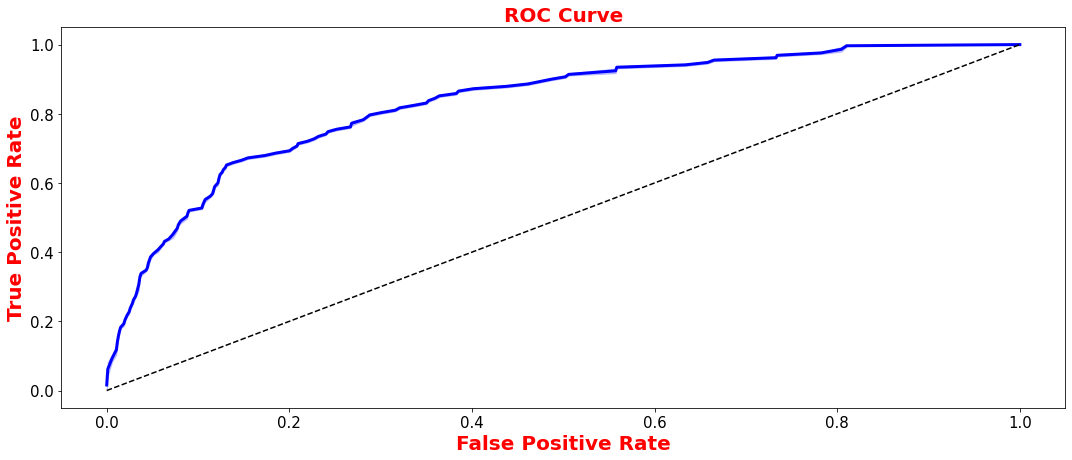

In [37]:
y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize = (18, 7))
plt.title("ROC Curve", color = "red", size = 20, weight = "bold")
sns.lineplot(x = fpr, y = tpr, color = "blue", linewidth = 3)
plt.xlabel("False Positive Rate", color = "red", size = 20, weight = "bold")
plt.ylabel("True Positive Rate", color = "red", size = 20, weight = "bold")
plt.plot([0, 1], [0, 1], "k--")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Area Under the Curve**

In [38]:
auc = roc_auc_score(y_test, y_pred_prob)
print(auc)

0.8309052733586367


**Decision Tree Classifier**

In [39]:
dtr = DecisionTreeClassifier()

dtr.fit(X_train, y_train)

pred_dtr = dtr.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_dtr}).sample(10)

,Actual,Predicted
3276,0,0
772,0,0
1846,0,0
1935,1,1
2145,0,0
2980,1,0
506,0,0
586,0,0
2381,0,0
2782,0,0


In [40]:
pd.DataFrame(confusion_matrix(y_test, pred_dtr))

,0,1
0,809,45
1,41,104


In [41]:
print(classification_report(y_test, pred_dtr))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       854
           1       0.70      0.72      0.71       145

    accuracy                           0.91       999
   macro avg       0.82      0.83      0.83       999
weighted avg       0.91      0.91      0.91       999



### Random Forest Classifier

In [42]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)

pd.DataFrame({"Actual": y_test, 
              "Predicted": pred_rfc}).sample(10)

,Actual,Predicted
1388,0,0
2830,0,0
1384,0,0
2614,1,1
2252,0,0
2424,0,0
833,0,0
2943,0,0
2689,0,0
3260,0,0


In [43]:
pd.DataFrame(confusion_matrix(y_test, pred_rfc))

,0,1
0,851,3
1,62,83


In [44]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       854
           1       0.97      0.57      0.72       145

    accuracy                           0.93       999
   macro avg       0.95      0.78      0.84       999
weighted avg       0.94      0.93      0.93       999



**Grid Search CV with Random Forest**

In [45]:
params = {"n_estimators": np.arange(50, 501, 50),
          "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

cv_rf = GridSearchCV(rf, params)

cv_rf.fit(X_train, y_train)

cv_rf.best_params_

{'criterion': 'gini', 'n_estimators': 250}

**Random Forest with Best Models**

In [46]:
rf_gc = RandomForestClassifier(criterion = "gini",
                               n_estimators = 350)

rf_gc.fit(X_train, y_train)

pred_rf_gc = rf_gc.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_rf_gc}).sample(10)

,Actual,Predicted
0,0,0
735,0,0
3134,0,0
2061,0,0
3223,0,0
2747,1,1
2379,0,0
2808,0,0
1679,1,1
935,0,0


In [47]:
pd.DataFrame(confusion_matrix(y_test, pred_rf_gc))

,0,1
0,853,1
1,66,79


In [48]:
print(classification_report(y_test, pred_rf_gc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       854
           1       0.99      0.54      0.70       145

    accuracy                           0.93       999
   macro avg       0.96      0.77      0.83       999
weighted avg       0.94      0.93      0.92       999



**Feature Importance by using Random Forest**

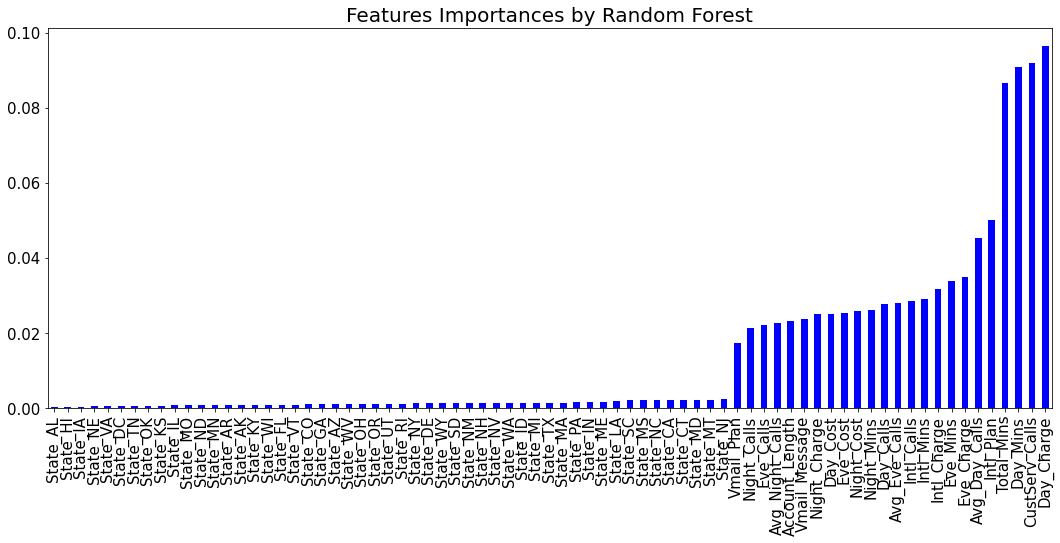

In [49]:
imp = pd.Series(data = rf_gc.feature_importances_, index = X.columns)
imp_sorted = imp.sort_values()
imp_sorted.plot(kind = "bar", color = "blue", figsize = (18, 7))
plt.title("Features Importances by Random Forest", size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

In [50]:
imp_sorted.tail()

Intl_Plan         0.050079
Total_Mins        0.086595
Day_Mins          0.090767
CustServ_Calls    0.091972
Day_Charge        0.096433
dtype: float64

**Select Top 5 Important Features**

In [51]:
imp_train = X_train[["Intl_Plan",
                     "Total_Mins",
                     "Day_Mins",
                     "CustServ_Calls",
                     "Day_Charge"]]

imp_test = X_test[["Intl_Plan",
                     "Total_Mins",
                     "Day_Mins",
                     "CustServ_Calls",
                     "Day_Charge"]]

**Grid Search CV with Important Features**

In [52]:
params = {"n_estimators": np.arange(50, 501, 50),
          "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

cv_rf = GridSearchCV(rf, params)

cv_rf.fit(imp_train, y_train)

cv_rf.best_params_

{'criterion': 'gini', 'n_estimators': 50}

In [53]:
rf_gc_imp = RandomForestClassifier(criterion = "entropy",
                                   n_estimators = 250)

rf_gc_imp.fit(imp_train, y_train)

pred_rf_gc_imp = rf_gc_imp.predict(imp_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_rf_gc_imp}).sample(10)

,Actual,Predicted
2051,0,0
1749,0,0
2886,0,0
1705,0,0
63,0,0
2034,0,0
140,0,0
3308,0,0
3235,0,0
2947,1,1


In [54]:
pd.DataFrame(confusion_matrix(y_test, pred_rf_gc_imp))

,0,1
0,812,42
1,66,79


In [55]:
print(classification_report(y_test, pred_rf_gc_imp))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       854
           1       0.65      0.54      0.59       145

    accuracy                           0.89       999
   macro avg       0.79      0.75      0.77       999
weighted avg       0.89      0.89      0.89       999

